In [71]:
import numpy as np
import pandas as pd
import pickle
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
df_purchase = pd.read_csv('D://z/purchase data.csv')

In [73]:
df_purchase.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,0,47,1,110866,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,0,47,1,110866,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0


In [130]:
df_purchase.shape

(58693, 24)

# Importing segmentation Model 

In [74]:
scaler = pickle.load(open('scaler.pickle','rb'))
pca = pickle.load(open('pca.pickle','rb'))
kmeans_pca = pickle.load(open('kmeans_pca.pickle','rb'))

## Standardization

In [75]:
features = df_purchase[['Sex','Marital status','Age','Education','Income','Occupation','Settlement size']]
df_purchase_seg_strd = scaler.transform(features)

## PCA

In [131]:
# Scores PCA
df_purchase_seg_pca = pca.transform(df_purchase_seg_strd)
df_purchase_seg_pca

array([[ 0.36215223, -0.63955673,  1.46270631],
       [ 0.36215223, -0.63955673,  1.46270631],
       [ 0.36215223, -0.63955673,  1.46270631],
       ...,
       [ 0.3617637 , -0.7398037 ,  1.15875419],
       [ 0.3617637 , -0.7398037 ,  1.15875419],
       [ 0.3617637 , -0.7398037 ,  1.15875419]])

## K-Means PCA

In [77]:
# using predict method of kmeans 
df_purchase_seg_kmeans_pca = kmeans_pca.predict(df_purchase_seg_pca)

In [78]:
df_purchase_predictors = df_purchase.copy()

In [79]:
df_purchase_predictors['segment'] = df_purchase_seg_kmeans_pca

In [80]:
df_purchase_predictors.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,segment
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,47,1,110866,1,0,1
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,1
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,1
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,47,1,110866,1,0,1
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,1


In [81]:
# Creating new dataframe to show each indvidual with count of purchases
temp1 = df_purchase_predictors[['ID','Incidence']].groupby(['ID'],as_index=False).count()
temp1 = temp1.rename(columns={'Incidence':'No_Of_Visits'})
temp1 = temp1.set_index('ID')
temp1

,No_Of_Visits
ID,
200000001,101
200000002,87
200000003,97
200000004,85
200000005,111
...,...
200000496,120
200000497,120
200000498,131


In [82]:
temp2 = df_purchase_predictors[['ID','Incidence']].groupby(['ID'],as_index=False).sum()
temp2 = temp2.rename(columns={'Incidence':'Total_purchase'})
temp2 = temp2.set_index('ID')
temp2

,Total_purchase
ID,
200000001,9
200000002,11
200000003,10
200000004,11
200000005,13
...,...
200000496,20
200000497,43
200000498,39


In [83]:
# Joining the two dataframes 
temp3 = temp1.join(temp2)
temp3.head()

,No_Of_Visits,Total_purchase
ID,,
200000001,101,9
200000002,87,11
200000003,97,10
200000004,85,11
200000005,111,13


In [84]:
# Getting the purchase frequency by dividing total purchase and number of visits
temp3['Frequency_No_purchase'] = temp3['Total_purchase'] / temp3['No_Of_Visits']

In [85]:
temp3.head()

,No_Of_Visits,Total_purchase,Frequency_No_purchase
ID,,,
200000001,101,9,0.089109
200000002,87,11,0.126437
200000003,97,10,0.103093
200000004,85,11,0.129412
200000005,111,13,0.117117


In [86]:
# which segment each individual belongs to 
temp4 = df_purchase_predictors[['ID','segment']].groupby(['ID'],as_index=False).mean()

temp4 = temp4.set_index('ID')
temp4

,segment
ID,
200000001,1
200000002,0
200000003,1
200000004,1
200000005,3
...,...
200000496,2
200000497,1
200000498,2


In [87]:
df_purchase_desc = temp3.join(temp4)
df_purchase_desc.head()

,No_Of_Visits,Total_purchase,Frequency_No_purchase,segment
ID,,,,
200000001,101,9,0.089109,1
200000002,87,11,0.126437,0
200000003,97,10,0.103093,1
200000004,85,11,0.129412,1
200000005,111,13,0.117117,3


## Segment Proportion

In [88]:
df_purchase_desc['segment'].value_counts()

1    188
3    110
2    104
0     98
Name: segment, dtype: int64

In [89]:
# proportion of segments with customer purchase in the dataset
seg_prop = df_purchase_desc[['No_Of_Visits','segment']].groupby(['segment']).count() / df_purchase_desc.shape[0]
seg_prop=seg_prop.rename(columns = {'No_Of_Visits':'segment_proportion'})
seg_prop

,segment_proportion
segment,
0,0.196
1,0.376
2,0.208
3,0.220


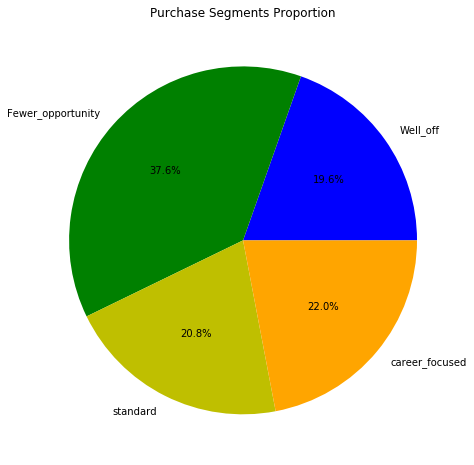

In [90]:
plt.figure(figsize=(16,8))
plt.pie(seg_prop['segment_proportion'],labels = ['Well_off','Fewer_opportunity','standard','career_focused'],
       autopct='%1.1f%%',
       colors=['b','g','y','orange'])
plt.title('Purchase Segments Proportion');

### We can see that fewer opportunity segment takes the largest proportion between all segments 

# Segment Statistics

In [94]:
segment_mean = df_purchase_desc.groupby(['segment']).mean()
segment_mean

,No_Of_Visits,Total_purchase,Frequency_No_purchase
segment,,,
0,117.295918,34.602041,0.284478
1,113.835106,22.792553,0.201755
2,117.471154,24.817308,0.212364
3,123.454545,39.827273,0.283102


In [93]:
segment_std = df_purchase_desc.groupby(['segment']).std()

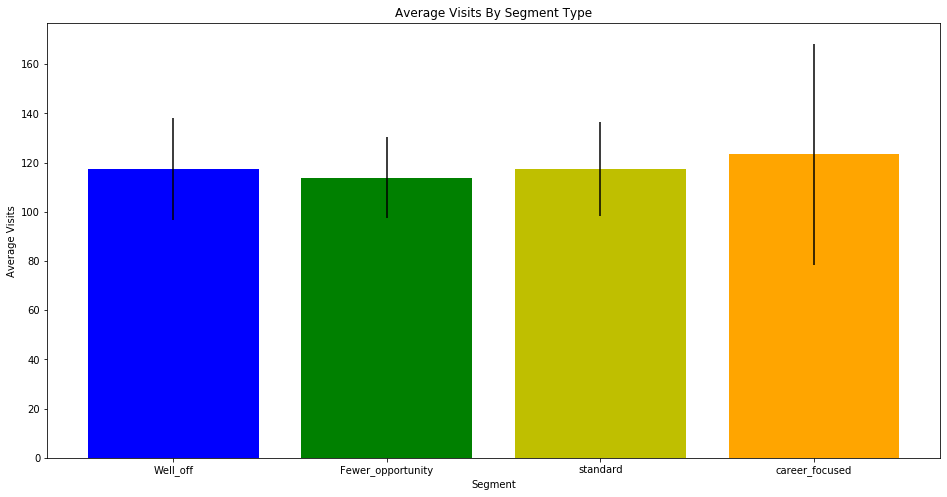

In [95]:
plt.figure(figsize=(16,8))
plt.bar(x=(0,1,2,3),tick_label=('Well_off','Fewer_opportunity','standard','career_focused'),
       height= segment_mean['No_Of_Visits'],
       color = ['b','g','y','orange'],
       yerr = segment_std['No_Of_Visits'])
plt.xlabel('Segment')
plt.ylabel('Average Visits')
plt.title('Average Visits By Segment Type');

#### We can see that career focused has the highest visits average among all segments, with the highest standard deviation which means they are least homogenous according to how often they visit the store, and fewer opportunity segment has the lowest average 

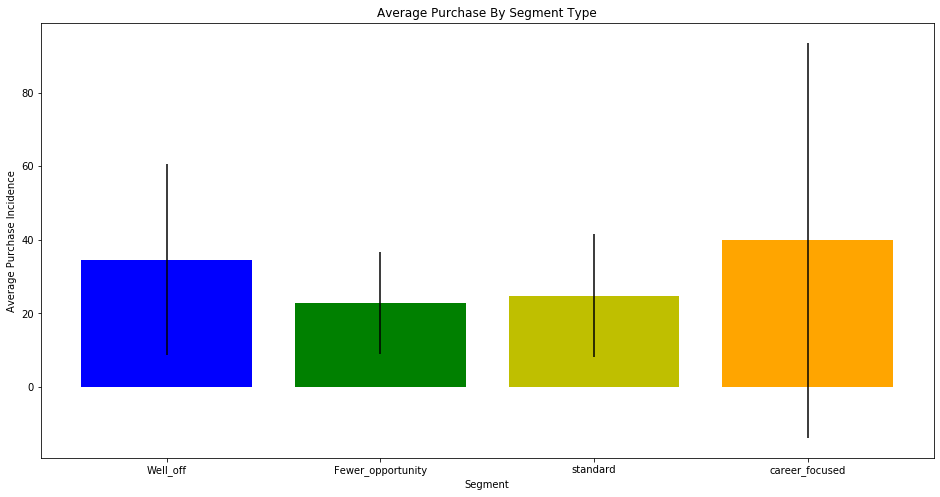

In [133]:
# plotting segment to total purchase frequency 
plt.figure(figsize=(16,8))
plt.bar(x=(0,1,2,3),tick_label=('Well_off','Fewer_opportunity','standard','career_focused'),
       height= segment_mean['Total_purchase'],
       color = ['b','g','y','orange'],
       yerr = segment_std['Total_purchase'])
plt.xlabel('Segment')
plt.ylabel('Average Purchase Incidence')
plt.title('Average Purchase By Segment Type');

#### As we noticed that also career focused segment are the has the highest numbers of purchase with the highest standard deviation, whic means there are some buy much less than others or vice versa. and fewer opportunity has the lowest purchase incidences as well. 

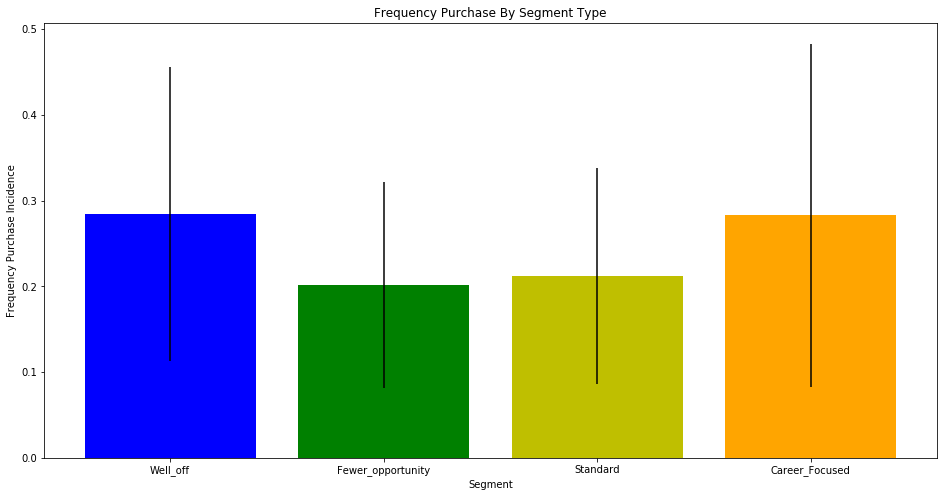

In [97]:
# plotting frequency purchase against segment type
plt.figure(figsize=(16,8))
plt.bar(x=(0,1,2,3),tick_label=('Well_off','Fewer_opportunity','Standard','Career_Focused'),
       height= segment_mean['Frequency_No_purchase'],
       color = ['b','g','y','orange'],
       yerr = segment_std['Frequency_No_purchase'])
plt.xlabel('Segment')
plt.ylabel('Frequency Purchase Incidence')
plt.title('Frequency Purchase By Segment Type');

#### From this plot we can see that well-off and career focused are the highest frequency of purchase in terms of no. of visits, with the highest standard deviations among all types

In [103]:
# Defining a Dataframe in cae of purchase only
df_purchase_incidence = df_purchase_predictors[df_purchase_predictors['Incidence']==1]

In [104]:
df_purchase_incidence

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,segment
6,200000001,28,1,2,2,0,0,1.50,1.90,1.99,...,0,0,0,0,47,1,110866,1,0,1
11,200000001,58,1,5,1,0,0,1.39,1.90,1.91,...,0,1,0,0,47,1,110866,1,0,1
19,200000001,110,1,1,2,0,0,1.47,1.90,1.99,...,1,0,0,0,47,1,110866,1,0,1
24,200000001,142,1,4,1,0,0,1.21,1.35,1.99,...,0,0,0,0,47,1,110866,1,0,1
29,200000001,183,1,2,3,0,0,1.46,1.88,1.97,...,1,1,0,0,47,1,110866,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58621,200000500,296,1,2,6,0,0,1.48,1.89,2.01,...,0,0,0,0,42,1,120946,1,0,1
58648,200000500,460,1,1,12,0,0,1.35,1.57,2.02,...,0,0,0,0,42,1,120946,1,0,1
58674,200000500,641,1,2,7,0,0,1.50,1.85,2.06,...,0,0,0,0,42,1,120946,1,0,1
58687,200000500,697,1,2,6,0,0,1.42,1.51,1.97,...,0,0,0,0,42,1,120946,1,0,1


In [105]:
brand_dummies = pd.get_dummies(df_purchase_incidence['Brand'],prefix = 'Brand',prefix_sep='_')
brand_dummies

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5
6,0,1,0,0,0
11,0,0,0,0,1
19,1,0,0,0,0
24,0,0,0,1,0
29,0,1,0,0,0
...,...,...,...,...,...
58621,0,1,0,0,0
58648,1,0,0,0,0
58674,0,1,0,0,0
58687,0,1,0,0,0


In [106]:
brand_dummies['segment'],brand_dummies['ID'] = df_purchase_incidence['segment'],df_purchase_incidence['ID']

In [107]:
brand_dummies

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,segment,ID
6,0,1,0,0,0,1,200000001
11,0,0,0,0,1,1,200000001
19,1,0,0,0,0,1,200000001
24,0,0,0,1,0,1,200000001
29,0,1,0,0,0,1,200000001
...,...,...,...,...,...,...,...
58621,0,1,0,0,0,1,200000500
58648,1,0,0,0,0,1,200000500
58674,0,1,0,0,0,1,200000500
58687,0,1,0,0,0,1,200000500


In [109]:
averag_choice_id = brand_dummies.groupby(['ID'],as_index=True).mean()
averag_choice_id

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,segment
ID,,,,,,
200000001,0.111111,0.444444,0.000000,0.222222,0.222222,1
200000002,0.000000,0.090909,0.000000,0.909091,0.000000,0
200000003,0.000000,0.800000,0.000000,0.000000,0.200000,1
200000004,0.000000,0.090909,0.000000,0.000000,0.909091,1
200000005,0.000000,0.000000,0.000000,0.000000,1.000000,3
...,...,...,...,...,...,...
200000496,0.050000,0.700000,0.000000,0.050000,0.200000,2
200000497,0.023256,0.651163,0.000000,0.302326,0.023256,1
200000498,0.128205,0.589744,0.282051,0.000000,0.000000,2


In [110]:
mean_brand_choice=averag_choice_id.groupby(['segment'],as_index=True).mean()
mean_brand_choice

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5
segment,,,,,
0,0.041928,0.117422,0.030610,0.613623,0.196417
1,0.138299,0.679494,0.021034,0.061875,0.099298
2,0.248771,0.402305,0.154976,0.058902,0.135045
3,0.072871,0.146808,0.039976,0.112395,0.627951


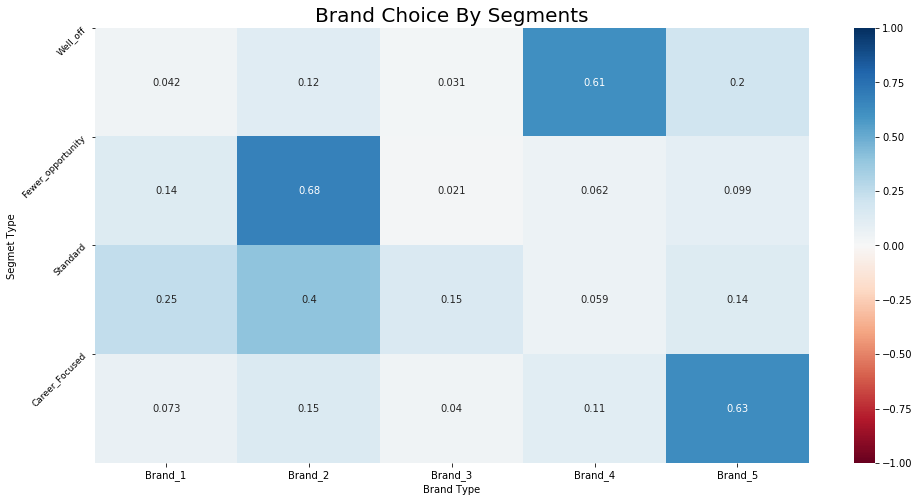

In [111]:
plt.figure(figsize=(16,8))
sns.heatmap(mean_brand_choice,vmin=-1,vmax=1,cmap='RdBu',annot=True)
plt.yticks([0,1,2,3],['Well_off','Fewer_opportunity','Standard','Career_Focused'],rotation=45,fontsize=9);
plt.xlabel('Brand Type')
plt.ylabel('Segmet Type')
plt.title('Brand Choice By Segments',fontsize=20);

##### from this heatmap we can tell that well off segment tends to favor brand 4, fewer opportunity favors brand 2, standard favors brand 2 & 1, career focused favors brand 5 

## Dissecting the Revenue By Segment

In [113]:
#Defining Dataframe for brand 1 only 
temp = df_purchase_predictors[df_purchase_predictors['Brand']==1]
temp.loc[:,'Revenue Brand1'] = temp['Price_1'] * temp['Quantity']

C:\Users\muham\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\muham\anaconda3\lib\site-packages\pandas\core\indexing.py:1675: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [115]:
temp.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,segment,Revenue Brand1
19,200000001,110,1,1,2,0,0,1.47,1.90,1.99,...,0,0,0,47,1,110866,1,0,1,2.94
556,200000006,636,1,1,5,0,0,1.31,1.56,2.00,...,0,0,0,39,1,112347,1,2,3,6.55
604,200000007,320,1,1,1,0,0,1.35,1.89,1.98,...,0,0,0,27,0,125190,2,1,3,1.35
799,200000009,374,1,1,2,0,0,1.21,1.87,2.02,...,0,0,0,25,0,108960,0,0,1,2.42
858,200000010,60,1,1,3,0,0,1.39,1.90,1.87,...,0,0,0,32,0,69370,0,0,1,4.17


In [116]:
segment_brand_revenue = pd.DataFrame()
segment_brand_revenue[['segment','Revenue Brand1']] = temp[['segment','Revenue Brand1']].groupby(['segment'],as_index=False).sum()
segment_brand_revenue

,segment,Revenue Brand1
0,0,699.47
1,1,2258.90
2,2,2611.19
3,3,736.09


In [117]:
temp = df_purchase_predictors[df_purchase_predictors['Brand']==2]
temp.loc[:,'Revenue Brand2'] = temp['Price_2'] * temp['Quantity']
segment_brand_revenue[['segment','Revenue Brand2']] = temp[['segment','Revenue Brand2']].groupby(['segment'],as_index=False).sum()


C:\Users\muham\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\muham\anaconda3\lib\site-packages\pandas\core\indexing.py:1675: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [118]:
temp = df_purchase_predictors[df_purchase_predictors['Brand']==3]
temp.loc[:,'Revenue Brand3'] = temp['Price_3'] * temp['Quantity']
segment_brand_revenue[['segment','Revenue Brand3']] = temp[['segment','Revenue Brand3']].groupby(['segment'],as_index=False).sum()


C:\Users\muham\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\muham\anaconda3\lib\site-packages\pandas\core\indexing.py:1675: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [119]:
temp = df_purchase_predictors[df_purchase_predictors['Brand']==4]
temp.loc[:,'Revenue Brand4'] = temp['Price_4'] * temp['Quantity']
segment_brand_revenue[['segment','Revenue Brand4']] = temp[['segment','Revenue Brand4']].groupby(['segment'],as_index=False).sum()


C:\Users\muham\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\muham\anaconda3\lib\site-packages\pandas\core\indexing.py:1675: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [120]:
temp = df_purchase_predictors[df_purchase_predictors['Brand']==5]
temp.loc[:,'Revenue Brand5'] = temp['Price_5'] * temp['Quantity']
segment_brand_revenue[['segment','Revenue Brand5']] = temp[['segment','Revenue Brand5']].groupby(['segment'],as_index=False).sum()
segment_brand_revenue

C:\Users\muham\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\muham\anaconda3\lib\site-packages\pandas\core\indexing.py:1675: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,segment,Revenue Brand1,Revenue Brand2,Revenue Brand3,Revenue Brand4,Revenue Brand5
0,0,699.47,1298.23,731.35,14185.57,5509.69
1,1,2258.90,13868.30,716.25,1629.31,2230.50
2,2,2611.19,4855.36,3909.17,861.38,2439.75
3,3,736.09,1746.42,664.75,2363.84,19441.06


In [121]:
# Total revenue for each segment from all brands
segment_brand_revenue['Total_revenue'] = (segment_brand_revenue['Revenue Brand1']+
                 segment_brand_revenue['Revenue Brand2']+
                 segment_brand_revenue['Revenue Brand3']+
                 segment_brand_revenue['Revenue Brand4']+
                 segment_brand_revenue['Revenue Brand5'])
segment_brand_revenue

,segment,Revenue Brand1,Revenue Brand2,Revenue Brand3,Revenue Brand4,Revenue Brand5,Total_revenue
0,0,699.47,1298.23,731.35,14185.57,5509.69,22424.31
1,1,2258.90,13868.30,716.25,1629.31,2230.50,20703.26
2,2,2611.19,4855.36,3909.17,861.38,2439.75,14676.85
3,3,736.09,1746.42,664.75,2363.84,19441.06,24952.16


In [122]:
segment_brand_revenue['segment_proportion']=seg_prop['segment_proportion']
segment_brand_revenue.set_index(['segment'])
segment_brand_revenue['segment']=segment_brand_revenue['segment'].map({0:'Well-Off',
                           1:'Fewer-oppurtunity',
                           2:'Standard',
                           3:'Career-Focused'})

In [123]:
segment_brand_revenue

,segment,Revenue Brand1,Revenue Brand2,Revenue Brand3,Revenue Brand4,Revenue Brand5,Total_revenue,segment_proportion
0,Well-Off,699.47,1298.23,731.35,14185.57,5509.69,22424.31,0.196
1,Fewer-oppurtunity,2258.90,13868.30,716.25,1629.31,2230.50,20703.26,0.376
2,Standard,2611.19,4855.36,3909.17,861.38,2439.75,14676.85,0.208
3,Career-Focused,736.09,1746.42,664.75,2363.84,19441.06,24952.16,0.220


##### From this dataframe we can see that fewer_opportunity has the largest size among other segments, followed by career_focused, we can see also that career focust although it is the second largest segment in size but has the highest revenue from all 5 brands, means that this segment specifically t=buy the most expensive brand 

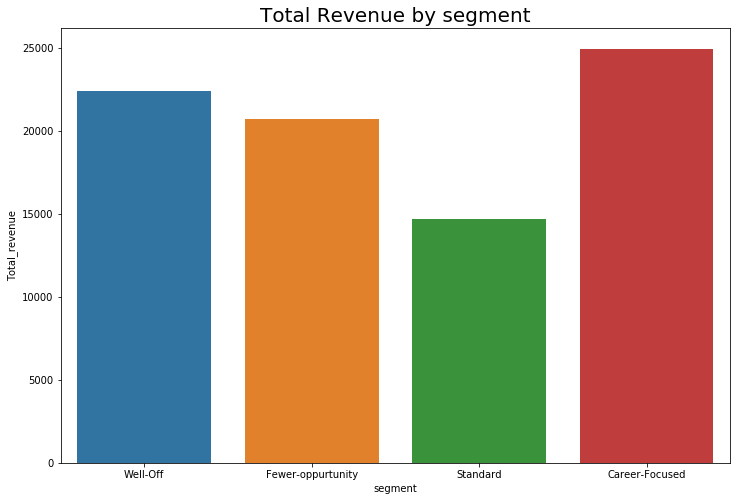

In [129]:
plt.figure(figsize=(12,8))
sns.barplot(segment_brand_revenue['segment'],segment_brand_revenue['Total_revenue'])
plt.title('Total Revenue by segment',fontsize=20);